# Graduate Admision prediction,,,ie;based on below given marks range if new students come then how much probability is there of selection of that student

In [1]:
# 1.GRE Scores ( out of 340 )
# 2.TOEFL Scores ( out of 120 )
# 3.University Rating ( out of 5 )
# 4.Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
# 5.Undergraduate GPA ( out of 10 )
# 6.Research Experience ( either 0 or 1 )
# 7.Chance of Admit ( ranging from 0 to 1 )#ie; 0 to 1 there are many no,,so continuous value

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv(r"D:\DEEP_LEARNING\4_Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()
#no any missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.duplicated().sum()
#all rows are unique

0

In [6]:
#but scaling is must before training it on ANN model
#bcz,,all values come in one range thus weights(coefficient) and bias(intercept) converges easily and fastly
#converges means,,best value of w and b is calculated ,such that on unseen data testing accuracy is high

In [7]:
#here we use Min-MAX scaler,,,bcz we know upper bound and lower bound of each column
#ie;GRE score has upper bound 340
# 2.TOEFL Scores ( out of 120 )
# 3.University Rating ( out of 5 )
# 4.Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
# 5.Undergraduate GPA ( out of 10 )
# 6.Research Experience ( either 0 or 1 )
#and lower bound for all is 0,,,,,
#if this is not the case then use StandardScaler()


In [8]:
df.drop(columns=['Serial No.'],inplace=True)#doesnt effect on prediction/selection

In [9]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2)

In [12]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((400, 7), (400,), (100, 7), (100,))

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)#bcz we are using same parameters which are calculated for scaling X_train,,so that both should compatible

In [14]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

# TRAINING ANN

In [15]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [16]:
model=Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(1,activation='linear'))#NOTE-->whenever u are dealing with regression problem  ,o/p layers has 1 node with
#activation function as 'linear'...only

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 1)                 8         
                                                                 
Total params: 64 (256.00 Byte)
Trainable params: 64 (256.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# dense (Dense)               (None, 7)                 56  ->H.L 1      
                                                                 
#  dense_1 (Dense)             (None, 1)                 8  ->o/p layer

In [19]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [20]:
history=model.fit(X_train_scaled,y_train,epochs=10,validation_split=0.2)
#for tracking accuracy use metrics=['accuracy']

Epoch 1/10
10/10 [==============================] - 0s 12ms/step - loss: 1.1966 - val_loss: 1.2570
Epoch 2/10
10/10 [==============================] - 0s 5ms/step - loss: 1.0349 - val_loss: 1.0984
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 0.9080 - val_loss: 0.9748
Epoch 4/10
10/10 [==============================] - 0s 5ms/step - loss: 0.8083 - val_loss: 0.8729
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 0.7275 - val_loss: 0.7908
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 0.6609 - val_loss: 0.7268
Epoch 7/10
10/10 [==============================] - 0s 5ms/step - loss: 0.6109 - val_loss: 0.6731
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 0.5706 - val_loss: 0.6292
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 0.5370 - val_loss: 0.5919
Epoch 10/10
10/10 [==============================] - 0s 4ms/step - loss: 0.5090 - val_loss: 0.5598


# predicting/testing ANN

In [21]:
y_pred=model.predict(X_test_scaled)
y_pred

4/4 [==============================] - 0s 3ms/step


array([[-0.07295094],
       [ 0.09172656],
       [-0.2261987 ],
       [ 0.09569117],
       [ 0.09641751],
       [ 0.09327066],
       [ 0.09411404],
       [ 0.09639584],
       [ 0.09551408],
       [ 0.09601158],
       [ 0.09980716],
       [ 0.09111813],
       [ 0.09191182],
       [-0.10901914],
       [ 0.09483288],
       [ 0.09725218],
       [-0.12182181],
       [-0.11435734],
       [ 0.0945207 ],
       [-0.02208275],
       [ 0.09574518],
       [ 0.09609118],
       [ 0.09734136],
       [ 0.09111813],
       [-0.11975131],
       [ 0.05551418],
       [ 0.09780943],
       [-0.05862244],
       [ 0.09649522],
       [ 0.09421863],
       [-0.07595422],
       [ 0.09646597],
       [ 0.0511828 ],
       [ 0.09838393],
       [-0.08083668],
       [ 0.05771355],
       [-0.03806599],
       [ 0.03910169],
       [ 0.01634982],
       [ 0.09652278],
       [-0.02941062],
       [ 0.09359708],
       [ 0.09424347],
       [ 0.09839945],
       [ 0.09407162],
       [-0

In [22]:
y_test

304    0.62
340    0.75
47     0.89
67     0.57
479    0.79
       ... 
11     0.84
192    0.86
92     0.34
221    0.75
110    0.61
Name: Chance of Admit , Length: 100, dtype: float64

In [23]:
y_pred.shape,y_test.shape

((100, 1), (100,))

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-25.192304975851293

In [25]:
#performance very bad

# ANN2 training

In [26]:
model2=Sequential()

model2.add(Dense(7,activation='relu',input_dim=7))
model2.add(Dense(7,activation='relu'))
model2.add(Dense(1,activation='linear'))
model2.compile(loss='mean_squared_error',optimizer='Adam')
history2=model2.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 0s 9ms/step - loss: 0.6665 - val_loss: 0.6641
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5685 - val_loss: 0.5961
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.5200 - val_loss: 0.5476
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4776 - val_loss: 0.5015
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4358 - val_loss: 0.4557
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3941 - val_loss: 0.4090
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3512 - val_loss: 0.3615
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3077 - val_loss: 0.3127
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2632 - val_loss: 0.2639
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2194 - val_loss: 0.2162
Epoch 11/

10/10 [==============================] - 0s 8ms/step - loss: 0.0080 - val_loss: 0.0080
Epoch 84/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0079 - val_loss: 0.0080
Epoch 85/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0079 - val_loss: 0.0079
Epoch 86/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0078 - val_loss: 0.0078
Epoch 87/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0078 - val_loss: 0.0078
Epoch 88/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 89/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0076 - val_loss: 0.0077
Epoch 90/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0076 - val_loss: 0.0076
Epoch 91/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0075 - val_loss: 0.0075
Epoch 92/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0075 - val_loss: 0.0074
Epoch 93/100


# ANN2 test

In [27]:
y_pred2=model2.predict(X_test_scaled)
y_pred2

4/4 [==============================] - 0s 4ms/step


array([[0.5188873 ],
       [0.6659118 ],
       [0.835534  ],
       [0.71761537],
       [0.8365697 ],
       [0.69366145],
       [0.7546654 ],
       [0.8266283 ],
       [0.78284216],
       [0.75340486],
       [0.6980239 ],
       [0.6478362 ],
       [0.81647915],
       [0.6570984 ],
       [0.7510974 ],
       [0.9271177 ],
       [0.6229254 ],
       [0.69224334],
       [0.82813156],
       [0.5926377 ],
       [0.665564  ],
       [0.8281687 ],
       [0.86204857],
       [0.72695875],
       [0.72619045],
       [0.5457321 ],
       [0.9617225 ],
       [0.6079456 ],
       [0.8561928 ],
       [0.66046304],
       [0.6303814 ],
       [0.77216995],
       [0.64426625],
       [0.8924584 ],
       [0.5110881 ],
       [0.732515  ],
       [0.673588  ],
       [0.6222898 ],
       [0.62771624],
       [0.8248447 ],
       [0.50078994],
       [0.7150674 ],
       [0.90847945],
       [0.9230262 ],
       [0.72041065],
       [0.45534134],
       [0.6280288 ],
       [0.603

In [28]:
y_test

304    0.62
340    0.75
47     0.89
67     0.57
479    0.79
       ... 
11     0.84
192    0.86
92     0.34
221    0.75
110    0.61
Name: Chance of Admit , Length: 100, dtype: float64

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred2)

0.7048206883235015


# plot loss 

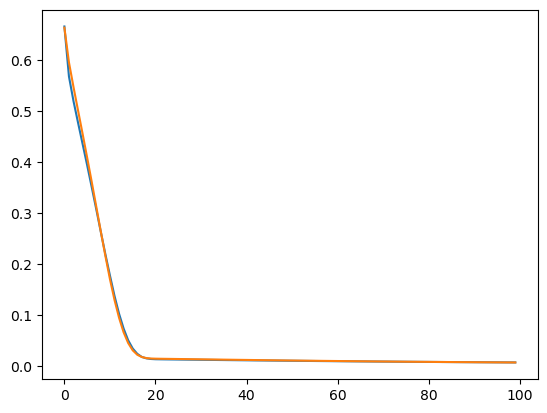

In [30]:
import matplotlib.pyplot as plt
plt.plot(history2.history['loss'])#blue
plt.plot(history2.history['val_loss'])#orange
#as u see at epochs loss decreasing ,,,both val_loss and loss are same ,,so model is not overfitted